<a href="https://www.kaggle.com/code/amirhosseinzinati/car-sale-linear-regression?scriptVersionId=179155580" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-sale-data/Car_Sale_Data.csv


In [2]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import plotly.express as px

# load Dataset

In [3]:
# read dataset and put it in DataFrame
data = pd.read_csv("../input/car-sale-data/Car_Sale_Data.csv")
data

,Car_Name,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


Dataset contain 301 row and 10 columns 

# EDA & PreProcessing¶


In [4]:
# Check For Missing Values
info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",data.isna().sum(),True)
info.insert(2,"Unique",data.nunique(),True)
info.insert(3,"Min",data.min(),True)
info.insert(4,"Max",data.max(),True)
info   

,IsNull,IsNa,Unique,Min,Max
Car_Name,0,0,98,800,xcent
Age,0,0,16,1,16
Selling_Price,0,0,156,0.1,35.0
Present_Price,0,0,147,0.32,92.6
Kms_Driven,0,0,206,500,500000
Fuel_Type,0,0,3,CNG,Petrol
Seller_Type,0,0,2,Dealer,Individual
Transmission,0,0,2,Automatic,Manual
Owner,0,0,3,0,3


as you can see we have both categorical and numerical features.

In [5]:
data.describe()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,5.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,1.000000,0.100000,0.320000,500.000000,0.000000
25%,3.000000,0.900000,1.200000,15000.000000,0.000000
50%,5.000000,3.600000,6.400000,32000.000000,0.000000
75%,7.000000,6.000000,9.900000,48767.000000,0.000000
max,16.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Age            301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [7]:
px.histogram(data, x = 'Car_Name' , text_auto = '.2f' , template = 'plotly_dark' , title = 'Precentage of Car Name')

In [8]:
px.histogram(
    data , x = ['Fuel_Type','Seller_Type','Transmission'] 
    , text_auto = '.2f' , template = 'plotly_dark' 
    , title = 'Car Info'
)

In [9]:
px.box(
    data , x = ['Selling_Price','Present_Price','Age'] 
    , template = 'plotly_dark' 
    , title = 'Car Info'
)

In [10]:
px.box(
    data , x = ['Kms_Driven'] 
    , template = 'plotly_dark' 
    , title = 'Kms_Driven'
)

In [11]:
data.corr()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
Age,1.000000,-0.236141,0.047584,0.524342,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000


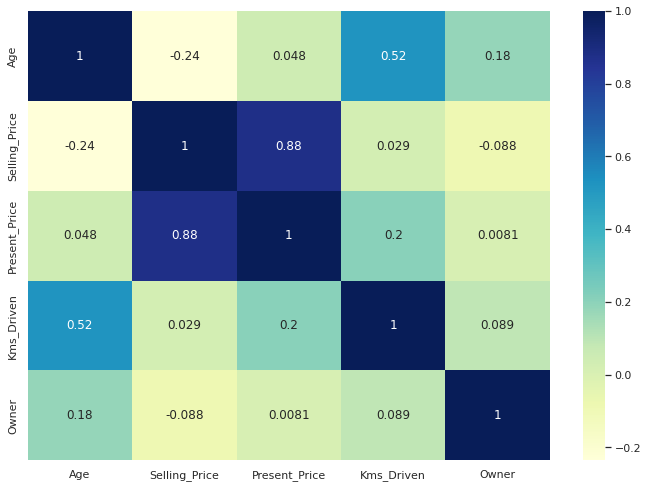

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

Categorical features must changed to numerical features cause model can understand feature . 

In [13]:
data['Fuel_Type'].replace({"Petrol":2,"Diesel":3,"CNG":4}, inplace=True)
data['Seller_Type'].replace({"Dealer":2,"Individual":3}, inplace=True)
data['Transmission'].replace({"Manual":2,"Automatic":3}, inplace=True)
data

,Car_Name,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,5,3.35,5.59,27000,2,2,2,0
1,sx4,6,4.75,9.54,43000,3,2,2,0
2,ciaz,2,7.25,9.85,6900,2,2,2,0
3,wagon r,8,2.85,4.15,5200,2,2,2,0
4,swift,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...
296,city,3,9.50,11.60,33988,3,2,2,0
297,brio,4,4.00,5.90,60000,2,2,2,0
298,city,10,3.35,11.00,87934,2,2,2,0
299,city,2,11.50,12.50,9000,3,2,2,0


before start modeling first remove Car_Name feature cause we dont needed.

In [14]:
data.drop(labels='Car_Name',axis=1,inplace=True)
data

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,2,2,2,0
1,6,4.75,9.54,43000,3,2,2,0
2,2,7.25,9.85,6900,2,2,2,0
3,8,2.85,4.15,5200,2,2,2,0
4,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,3,2,2,0
297,4,4.00,5.90,60000,2,2,2,0
298,10,3.35,11.00,87934,2,2,2,0
299,2,11.50,12.50,9000,3,2,2,0


# Model

In [15]:
# Determaine X And Y
X = data.drop(columns={'Selling_Price'},axis=1)
y = data["Selling_Price"].values.reshape(-1,1)
X

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,5.59,27000,2,2,2,0
1,6,9.54,43000,3,2,2,0
2,2,9.85,6900,2,2,2,0
3,8,4.15,5200,2,2,2,0
4,5,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...
296,3,11.60,33988,3,2,2,0
297,4,5.90,60000,2,2,2,0
298,10,11.00,87934,2,2,2,0
299,2,12.50,9000,3,2,2,0


In [16]:
# Split Data For Train And Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
# Make Model
regressor = LinearRegression()

In [18]:
# Fit Model
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
print("================================> Model Result <================================")
print("Intercept = ",regressor.intercept_)
print("Slope = ",regressor.coef_)
print("===================================> Result <===================================")
print("ModelScore                     = ",regressor.score(X_test,y_test))
print("Mean Absolute Error (MAE)      = ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)       = ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE) = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score                       = ",metrics.r2_score(y_test,y_pred))


================================> Model Result <================================
Intercept =  [-0.0124171]
Slope =  [[-3.92595063e-01  4.36619980e-01 -5.48584299e-06  1.44377315e+00
  -1.12076998e+00  1.43830531e+00 -9.89222658e-01]]
===================================> Result <===================================
ModelScore                     =  0.9134181721224436
Mean Absolute Error (MAE)      =  1.000032601214668
Mean Squared Error (MSE)       =  2.1885564456578677
Root Mean Squared Error (RMSE) =  1.479377046482021
R2 Score                       =  0.9134181721224436


# Improve
## Let's Try making non linear features
### Dimention =X^2

In [21]:
X = pd.DataFrame(data,columns=['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','Age'])
y = data.Selling_Price.values.reshape(-1,1)

In [22]:
# making Function 
def check(Dimention,TestSize):
    r2= 0.9134181721224436
    for column in X :
        NEW_COl_NAME = column + str(Dimention)
        NEW_COL_VAL = X[column]** Dimention
        X.insert(0, NEW_COl_NAME, NEW_COL_VAL)
        
        # Split Data For Train And Test
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TestSize,random_state=0)
        
        # Make Model
        New_Model = LinearRegression()
        New_Model.fit(X_train,y_train)
        
        y_pred = New_Model.predict(X_test)
        r2_new = metrics.r2_score(y_test,y_pred)
        
        if r2_new < r2 :
            X.drop([NEW_COl_NAME],axis =1,inplace = True)
        else :
            r2= r2_new 
        
    print("R2 Score : ",r2)

In [23]:
check(2,0.2)


R2 Score :  0.9311515410544492


## R2_Score(2)=0.0.93 >R2_Score(1)=0.91

## Let's Try making non linear features
### DotProduct Features


In [24]:
Pres_kms =X["Present_Price"] * X["Kms_Driven"]
Pres_kms2 =X["Present_Price"] * X["Kms_Driven2"]
Pres_Fuel =X["Present_Price"] * X["Fuel_Type"]
Pres_Fuel2 =X["Present_Price"] * X["Fuel_Type2"]
Pres2_kms =X["Present_Price2"] * X["Kms_Driven"]
Pres2_kms2 =X["Present_Price2"] * X["Kms_Driven2"]
Pres2_Fuel =X["Present_Price2"] * X["Fuel_Type"]
Pres2_Fuel2 =X["Present_Price2"] * X["Fuel_Type2"]

In [25]:
X.insert(0,"Pres_kms",Pres_kms)
X.insert(0,"Pres_kms2",Pres_kms2)
X.insert(0,"Pres_Fuel",Pres_Fuel)
X.insert(0,"Pres_Fuel2",Pres_Fuel2)
X.insert(0,"Pres2_kms",Pres2_kms)
X.insert(0,"Pres2_kms2",Pres2_kms2)
X.insert(0,"Pres2_Fuel",Pres2_Fuel)
X.insert(0,"Pres2_Fuel2",Pres2_Fuel2)

In [26]:
# Split Data For Train And Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
# Make Model
model = LinearRegression()

In [28]:
# Fit Model
model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
print("================================> Model Result <================================")
print("Intercept = ",model.intercept_)
print("Slope = ",model.coef_)
print("===================================> Result <===================================")
print("ModelScore                     = ",model.score(X_test,y_test))
print("Mean Absolute Error (MAE)      = ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)       = ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE) = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score                       = ",metrics.r2_score(y_test,y_pred))

================================> Model Result <================================
Intercept =  [-1.67321127]
Slope =  [[-3.17692843e-02  1.69236102e-01  7.89367850e-13 -1.11206699e-08
   1.07448191e-01 -4.65566925e-01  1.83089322e-11 -9.78699772e-06
  -2.65296275e-01  5.15634131e-02 -5.82347360e-11 -2.27653459e-01
   1.64903635e+00  3.12885292e-05 -8.04130025e-01  5.59879275e-01
   8.04853638e-01  5.87104370e-01 -2.38206144e-01]]
===================================> Result <===================================
ModelScore                     =  0.9528142925343482
Mean Absolute Error (MAE)      =  0.7263863909732038
Mean Squared Error (MSE)       =  1.192728159573169
Root Mean Squared Error (RMSE) =  1.0921209454878011
R2 Score                       =  0.9528142925343482


## R2_Score(3)=0.0.95 >R2_Score(2)=0.93

## Now Lets Try KFold

In [31]:
k_fold = KFold(5)
result = (cross_val_score(model, X,y,cv=k_fold,n_jobs=-1))
print(result)
print(np.mean(result))

[  0.92455675   0.47756749 -23.72880496   0.58594804   0.88655986]
-4.1708345620530105


In [32]:
X.shape

(301, 19)

In [33]:
301/6

50.166666666666664

In [34]:
df = X[X.index<100]
df2 = X[X.index>151]
X_new =  df.append(df2)
X_new.reset_index(drop=True, inplace = True)
X_new 

,Pres2_Fuel2,Pres2_Fuel,Pres2_kms2,Pres2_kms,Pres_Fuel2,Pres_Fuel,Pres_kms2,Pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [35]:
y = data["Selling_Price"]
y1 = y[y.index<100]
y2 = y[y.index>151]
y_new = y1.append(y2)
y_new.reset_index(drop=True, inplace = True)
y_new.shape 

(249,)

In [36]:
# Split Data For Train And Test
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=0)

In [37]:
# Make Model
model = LinearRegression()

In [38]:
# Fit Model
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
print("================================> Model Result <================================")
print("Intercept = ",model.intercept_)
print("Slope = ",model.coef_)
print("===================================> Result <===================================")
print("ModelScore                     = ",model.score(X_test,y_test))
print("Mean Absolute Error (MAE)      = ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)       = ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE) = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score                       = ",metrics.r2_score(y_test,y_pred))

================================> Model Result <================================
Intercept =  -0.6624911346427043
Slope =  [-2.20946174e-02  1.16886614e-01  1.64146770e-12 -1.24090085e-07
  4.83891459e-02 -1.30816964e-01  9.16281975e-12 -8.78775629e-06
 -5.27443506e-01 -2.75909233e-02 -6.38836089e-11 -1.53323413e-01
  1.08104601e+00  3.64491325e-05 -4.81488863e-01  2.89570493e-01
  7.49292092e-01  9.21199395e-01 -2.95889103e-01]
===================================> Result <===================================
ModelScore                     =  0.9771360806310533
Mean Absolute Error (MAE)      =  0.6748028594139128
Mean Squared Error (MSE)       =  0.840382730376355
Root Mean Squared Error (RMSE) =  0.9167239117511635
R2 Score                       =  0.9771360806310533


## R2_Score(4)=0.0.97 >R2_Score(3)=0.95

## Well Done We Get Almost 97 % in R2_Score 

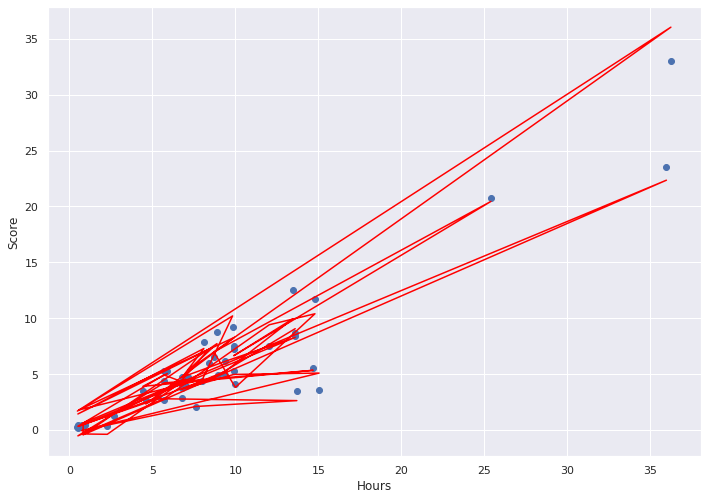

In [41]:
a = X_test.Present_Price
b = y_test
c = X_test.Present_Price
d = y_pred
plt.scatter(a,b)
plt.plot(c,d,color='red')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [42]:
X_test.insert(3,"y_test",y_test)
X_test.insert(5,"y_pred",y_pred)

In [43]:
df3=X_test.sort_values(by=["Present_Price"])


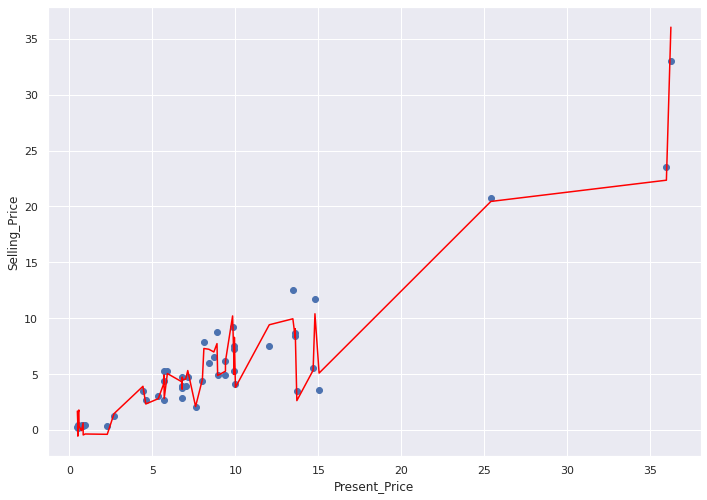

In [44]:
a = df3.Present_Price
b = df3.y_test
c = df3.Present_Price
d = df3.y_pred
plt.scatter(a,b)
plt.plot(c,d,color='red')
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.grid(True)
plt.show()